In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/LIMFADD.csv')

In [5]:
df.head()

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
0,2,2757,1378.5,0,0,N,N,N,0,N,Bot
1,2,505,252.5,0,0,N,Yes,N,0,N,Scam
2,6786,1782,0.262599469,1589,6051.040404,yes,N,Yes,10,N,Real
3,21,1281,61,0,0,N,Yes,N,0,N,Bot
4,585,1682,2.875213675,2663,926.1920333,yes,N,N,12,Yes,Real


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Followers            15000 non-null  int64 
 1   Following            15000 non-null  int64 
 2   Following/Followers  15000 non-null  object
 3   Posts                15000 non-null  int64 
 4   Posts/Followers      15000 non-null  object
 5   Bio                  15000 non-null  object
 6   Profile Picture      15000 non-null  object
 7   External Link        15000 non-null  object
 8   Mutual Friends       15000 non-null  int64 
 9   Threads              15000 non-null  object
 10  Labels               15000 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB


In [7]:
df.sample(10)

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
10406,6,443,73.83333333,1,0.013544018,Yes,Yes,N,0,N,Scam
993,3,57,19,4,0.210526316,Yes,Yes,N,0,N,Scam
5094,0,428,#DIV/0!,4,#DIV/0!,Yes,Yes,N,0,N,Scam
2700,36,5566,154.6111111,0,0,N,Yes,N,0,N,Bot
10110,16367,1399,0.085476874,1410,16495.68978,Yes,N,Yes,7,Yes,Real
8331,38011,121,0.003183289,320,100524.9587,Yes,N,Yes,6,N,Spam
4745,6178,129,0.020880544,397,19012.91473,Yes,Yes,Yes,7,N,Real
8567,147075,358,0.002434132,478,196373.8827,Yes,N,Yes,5,N,Spam
4276,0,127,#DIV/0!,4,#DIV/0!,N,N,N,0,N,Scam
5077,112508,936,0.008319408,183,21996.75641,Yes,Yes,N,6,N,Spam


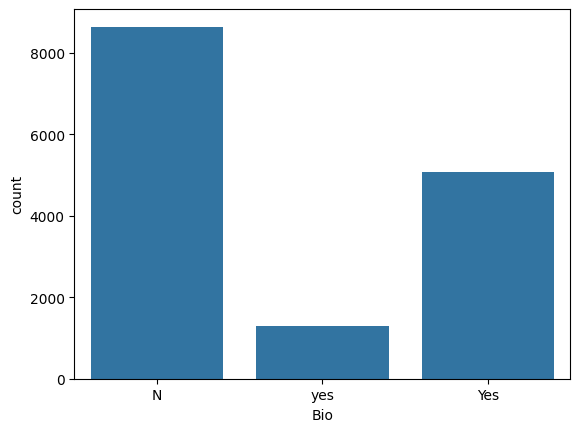

In [8]:
sns.countplot(x='Bio', data=df)
plt.show()

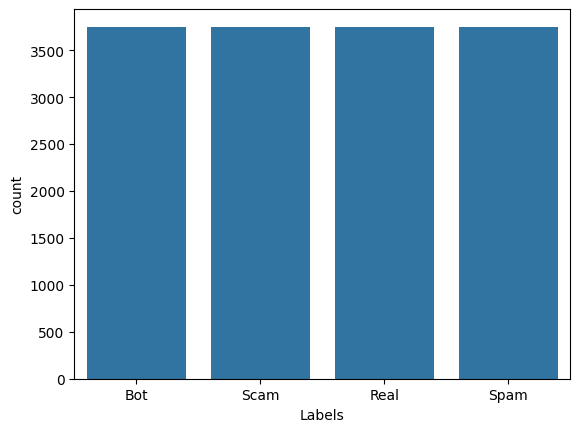

In [9]:
sns.countplot(x='Labels', data=df)
plt.show()

In [10]:
df['Labels'].value_counts()

,count
Labels,
Bot,3750
Scam,3750
Real,3750
Spam,3750


<Axes: ylabel='count'>

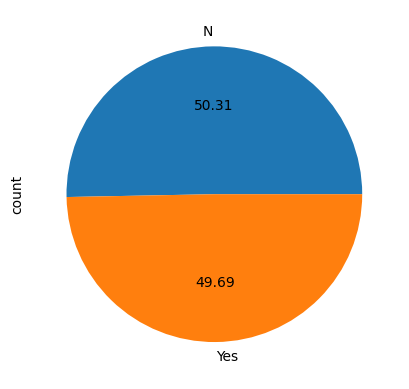

In [11]:
df['Profile Picture'].value_counts().plot(kind='pie',autopct='%.2f')

In [12]:
df.isnull().sum()

,0
Followers,0
Following,0
Following/Followers,0
Posts,0
Posts/Followers,0
Bio,0
Profile Picture,0
External Link,0
Mutual Friends,0
Threads,0


In [13]:
df['Following/Followers'] = pd.to_numeric(df['Following/Followers'], errors='coerce')

In [14]:
df['Posts/Followers'] = pd.to_numeric(df['Posts/Followers'], errors='coerce')

In [16]:
binary_cols = ['Bio', 'Profile Picture', 'External Link', 'Threads']

for col in binary_cols:
    df[col] = (
        df[col].astype(str)
        .str.strip()
        .str.lower()
        .replace({'yes': 1, 'y': 1, 'no': 0, 'n': 0})
        .astype(int)
    )

In [17]:
df.sample(10)

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
11726,7,307,43.857143,1,0.022801,1,1,0,0,0,Scam
2859,0,74,NaN,2,NaN,1,0,0,0,0,Scam
9118,6,589,98.166667,3,0.030560,1,1,0,0,0,Scam
1014,7,618,88.285714,4,0.045307,1,1,0,0,0,Scam
10047,10470,2251,0.214995,211,981.417148,1,1,1,6,0,Real
4394,16403,82,0.004999,2296,459284.000000,1,1,0,6,0,Real
9466,5758,2014,0.349774,2168,6198.284012,0,0,0,11,1,Real
4840,21696,893,0.041160,1142,27745.612540,1,1,1,10,0,Real
465,20,3213,160.650000,0,0.000000,0,0,0,0,0,Bot
8552,2,62,31.000000,4,0.129032,0,0,0,0,0,Scam


In [18]:
df.isnull().sum()

,0
Followers,0
Following,0
Following/Followers,562
Posts,0
Posts/Followers,566
Bio,0
Profile Picture,0
External Link,0
Mutual Friends,0
Threads,0


In [19]:
df = df.dropna()

In [20]:
df.shape

(14434, 11)

In [21]:
df['Labels'].unique()

array(['Bot', 'Scam', 'Real', 'Spam'], dtype=object)

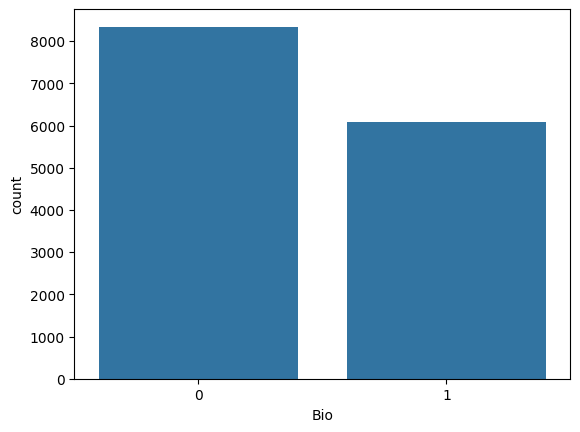

In [22]:
sns.countplot(x='Bio', data=df)
plt.show()

In [23]:
df['Labels'].value_counts()

,count
Labels,
Real,3750
Spam,3746
Bot,3680
Scam,3258


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14434 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Followers            14434 non-null  int64  
 1   Following            14434 non-null  int64  
 2   Following/Followers  14434 non-null  float64
 3   Posts                14434 non-null  int64  
 4   Posts/Followers      14434 non-null  float64
 5   Bio                  14434 non-null  int64  
 6   Profile Picture      14434 non-null  int64  
 7   External Link        14434 non-null  int64  
 8   Mutual Friends       14434 non-null  int64  
 9   Threads              14434 non-null  int64  
 10  Labels               14434 non-null  object 
dtypes: float64(2), int64(8), object(1)
memory usage: 1.3+ MB


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Labels'] = le.fit_transform(df['Labels'])

In [26]:
df.sample(10)

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
13770,6411,977,0.152394,1525,10006.934490,1,1,1,0,0,1
6592,18,1837,102.055556,0,0.000000,0,1,0,0,0,0
1181,16771,19,0.001133,1062,937410.631600,1,1,0,8,1,1
13974,7981,437,0.054755,2484,45365.684210,1,1,0,3,0,1
7896,160719,1005,0.006253,597,95471.883580,0,0,1,6,0,3
1659,14347,663,0.046212,916,19821.797890,1,1,0,4,1,1
11116,133105,758,0.005695,214,37578.456460,0,0,0,6,0,3
7771,18289,663,0.036251,314,8661.758673,0,1,1,4,1,1
9441,29,6433,221.827586,1,0.004508,0,1,0,0,0,0
1424,7,662,94.571429,2,0.021148,1,1,0,0,0,2


In [27]:
df['Labels'].value_counts()

,count
Labels,
1,3750
3,3746
0,3680
2,3258


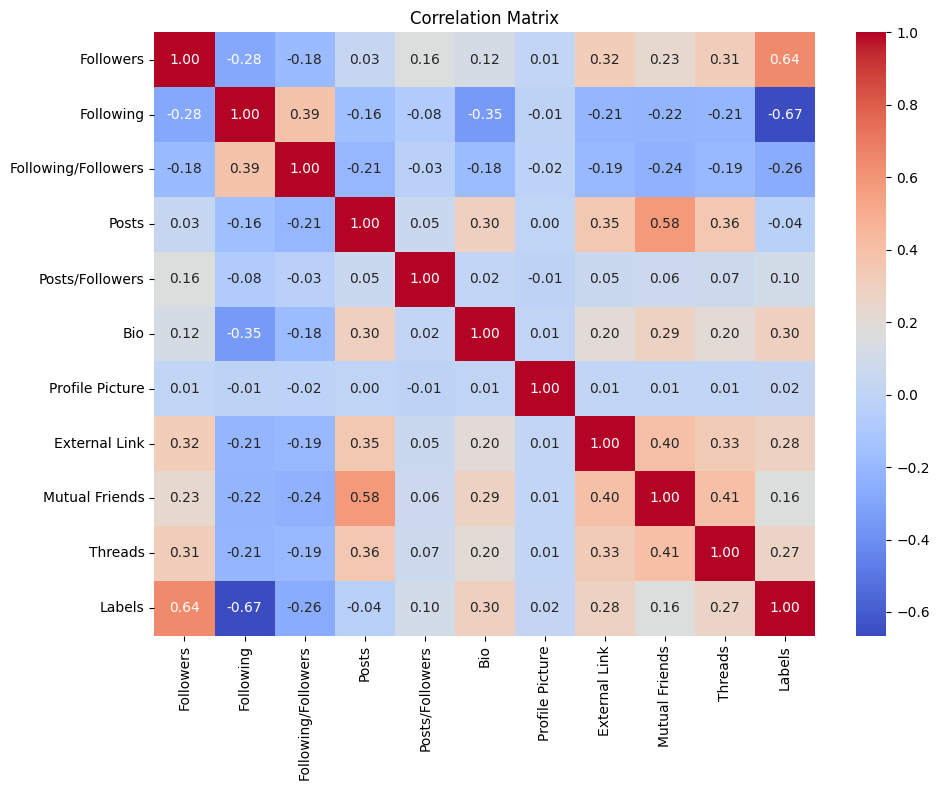

In [28]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

<Axes: xlabel='Labels', ylabel='Followers'>

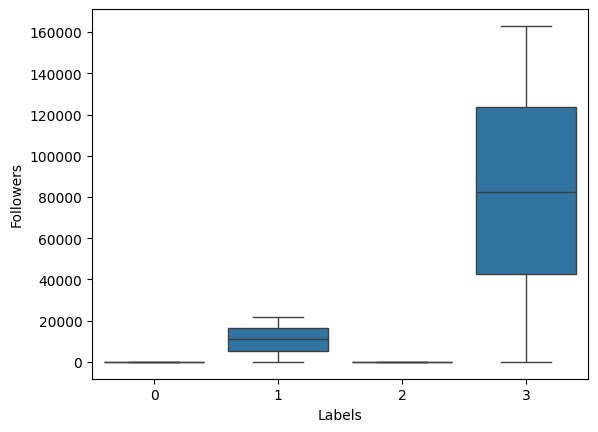

In [29]:
sns.boxplot(x = 'Labels', y = 'Followers', data = df)

<Axes: xlabel='Labels', ylabel='Following'>

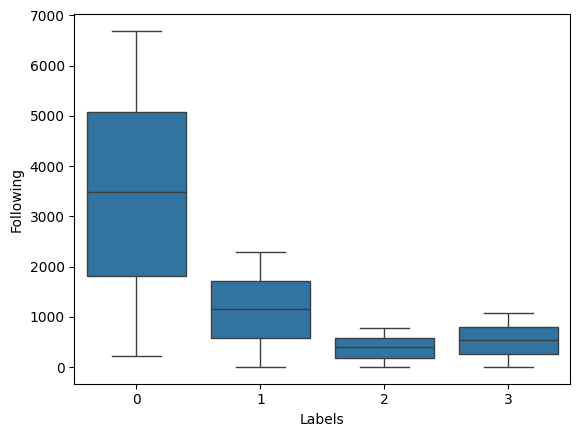

In [30]:
sns.boxplot(x = 'Labels', y = 'Following', data = df)

In [31]:
df.groupby('Labels')['Followers'].mean()

,Followers
Labels,
0,24.541033
1,10976.940533
2,3.998158
3,82559.757875


In [32]:
df.groupby('Labels')['Following'].mean()

,Following
Labels,
0,3469.928533
1,1144.921067
2,385.087784
3,536.551255


In [33]:
df.groupby('Labels')['Posts'].mean()

,Posts
Labels,
0,1.008696
1,1341.824533
2,2.023327
3,366.531767


In [34]:
df.groupby('Labels')['Profile Picture'].mean()

,Profile Picture
Labels,
0,0.482065
1,0.493867
2,0.496931
3,0.512280


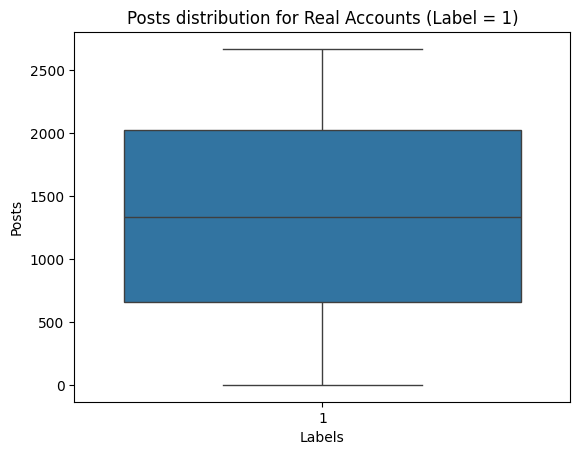

In [35]:
sns.boxplot(x='Labels', y='Posts', data=df[df['Labels'] == 1])
plt.title('Posts distribution for Real Accounts (Label = 1)')
plt.show()

In [36]:
df.groupby('Labels')['Bio'].mean()

,Bio
Labels,
0,0.000000
1,0.683467
2,0.501842
3,0.505873


In [37]:
df.groupby('Labels')['Mutual Friends'].mean()

,Mutual Friends
Labels,
0,0.000000
1,7.596533
2,0.000000
3,4.451949


In [38]:
df.groupby('Labels')['External Link'].mean()

,External Link
Labels,
0,0.000000
1,0.492800
2,0.000000
3,0.516284


In [39]:
df.groupby('Labels')['Following/Followers'].mean()

,Following/Followers
Labels,
0,314.479512
1,0.605221
2,141.025288
3,0.032954


In [40]:
df.groupby('Labels')['Posts/Followers'].mean()

,Posts/Followers
Labels,
0,0.012633
1,56699.904541
2,0.081251
3,201250.043615


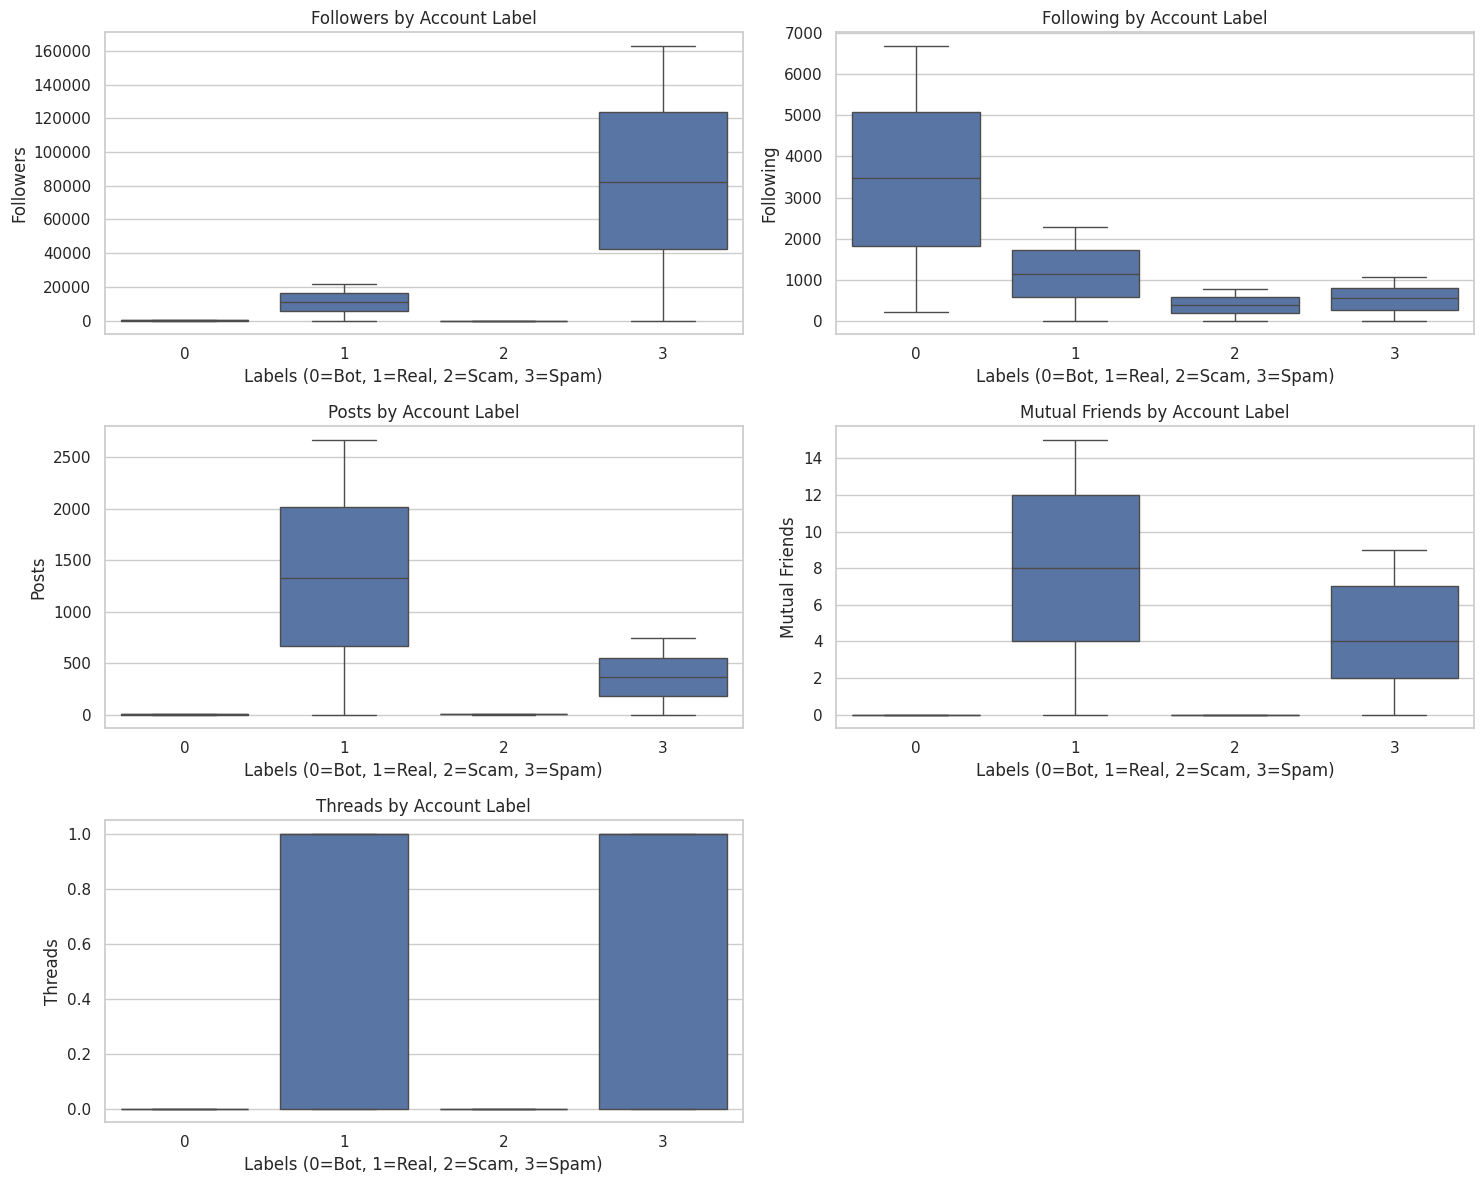

In [41]:
sns.set(style="whitegrid")

# Features you want to visualize
features = ['Followers', 'Following', 'Posts', 'Mutual Friends', 'Threads']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Loop through features and plot
for i, feature in enumerate(features):
    sns.boxplot(data=df, x='Labels', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Account Label')
    axes[i].set_xlabel('Labels (0=Bot, 1=Real, 2=Scam, 3=Spam)')
    axes[i].set_ylabel(feature)

# Remove extra axes if needed
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

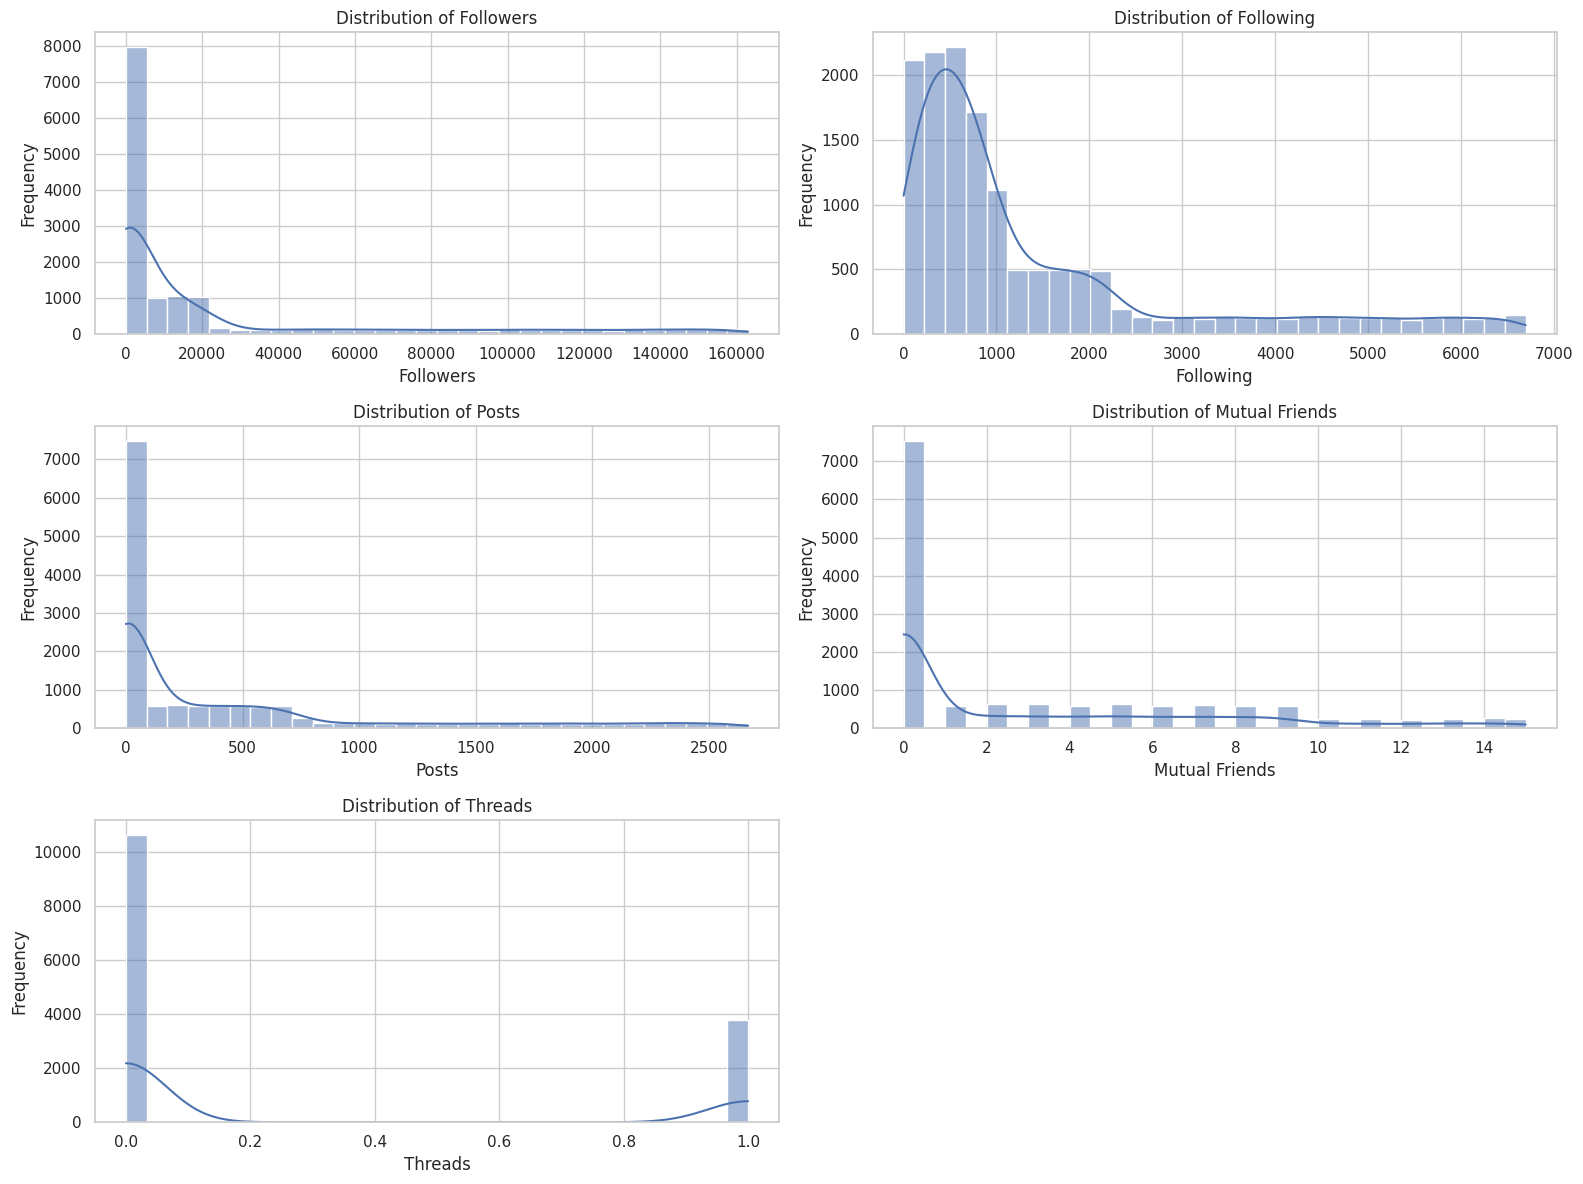

In [42]:
# Key features you want to visualize
features = ['Followers', 'Following', 'Posts', 'Mutual Friends', 'Threads']

# Plot histograms with KDE for each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

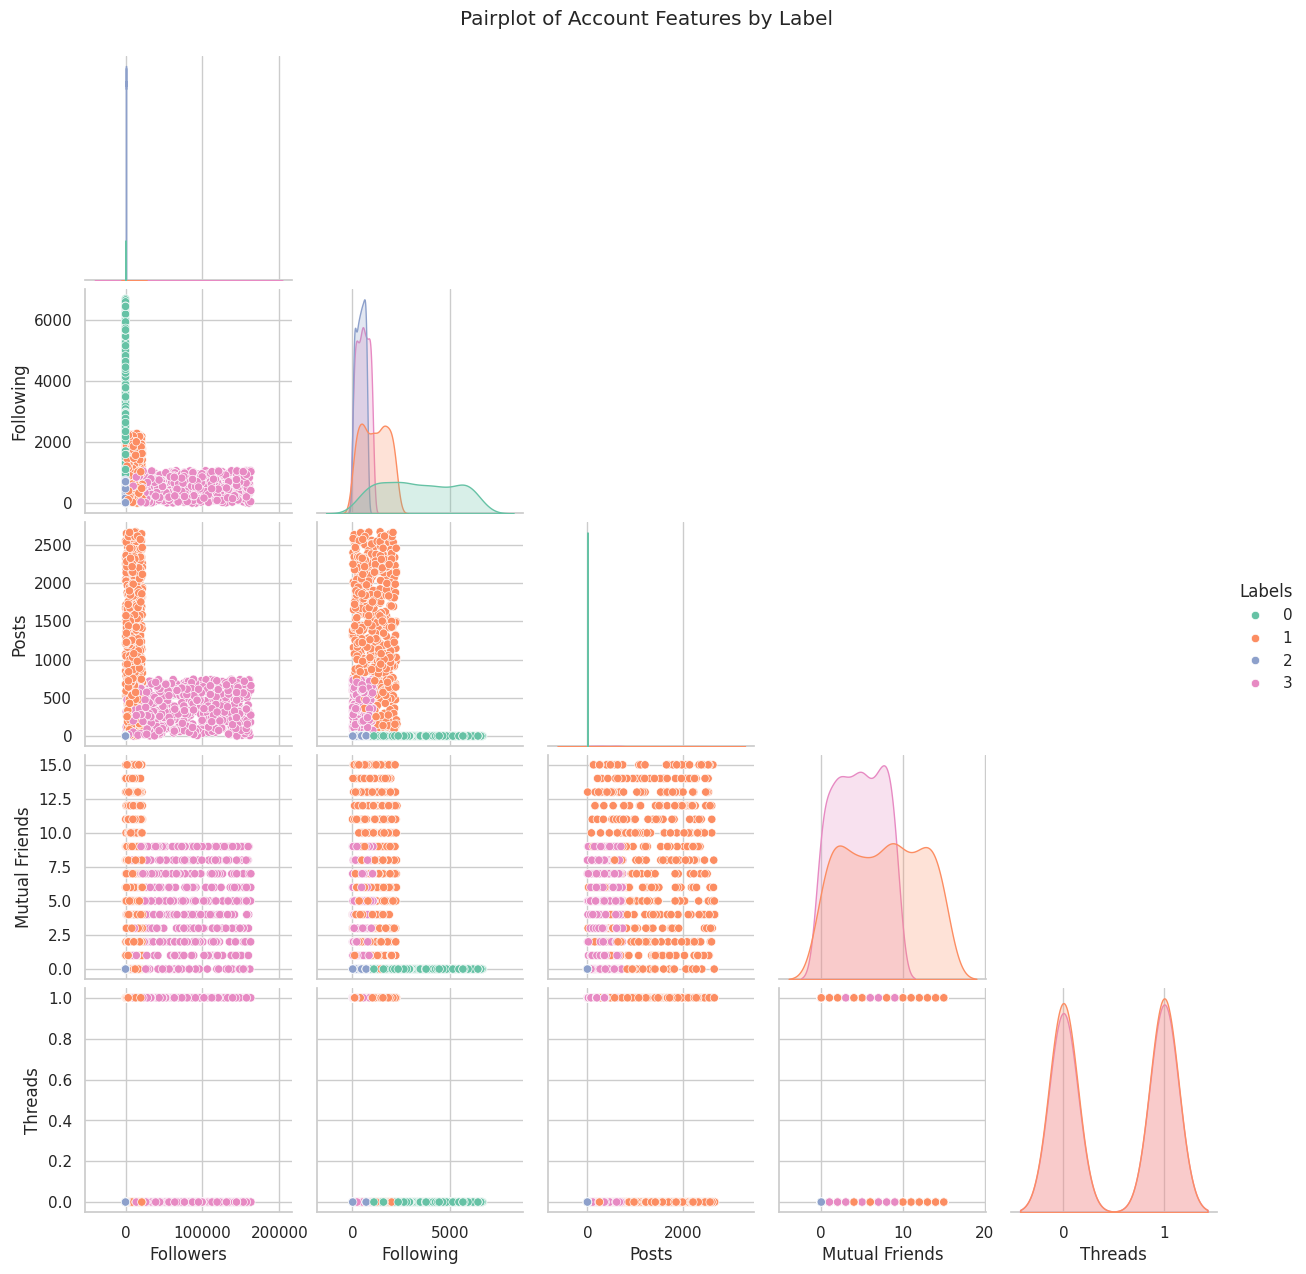

In [43]:
selected_features = ['Followers', 'Following', 'Posts', 'Mutual Friends', 'Threads', 'Labels']

# Sample down if your dataset is large to speed it up
sample_df = df[selected_features].sample(2000, random_state=42)  # Optional

# Plot pairplot
sns.pairplot(sample_df, hue='Labels', corner=True, diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Account Features by Label', y=1.02)
plt.show()

In [44]:
df['Mutual Friends Ratio'] = df['Mutual Friends'] / (df['Followers'] + df['Following'] + 1)

In [45]:
df.sample(10)

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels,Mutual Friends Ratio
11944,138186,1048,0.007584,232,30590.793890,0,0,1,3,1,3,0.000022
2203,5,2842,568.400000,1,0.001759,0,1,0,0,0,0,0.000000
11193,2,61,30.500000,4,0.131148,1,0,0,0,0,2,0.000000
11757,8796,2241,0.254775,2303,9039.352075,1,0,0,6,1,1,0.000544
7309,100261,910,0.009076,119,13111.053850,0,0,0,5,1,3,0.000049
8149,14,3034,216.714286,0,0.000000,0,0,0,0,0,0,0.000000
14602,19,4755,250.263158,2,0.007992,0,0,0,0,0,0,0.000000
5928,1655,104,0.062840,266,4232.980769,1,1,0,9,0,1,0.005114
13520,7,500,71.428571,1,0.014000,1,1,0,0,0,2,0.000000
4449,9,3741,415.666667,0,0.000000,0,1,0,0,0,0,0.000000


In [46]:
df.groupby('Labels')['Mutual Friends Ratio'].mean()

,Mutual Friends Ratio
Labels,
0,0.000000
1,0.001237
2,0.000000
3,0.000166


In [47]:
df["Engagement Score"] = (
    (df["Posts"] / (df["Following"] + 1)) +    # posting activity normalized
    (df["Threads"] / (df["Following"] + 1)) +  # threads normalized
    (df["Mutual Friends"] / (df["Following"] + 1)) +  # social connectivity
    (df["Followers"] / (df["Following"] + 1))  # following behavior
)
df["Engagement Score"] += (
    df["Profile Picture"] * 1 +
    df["Bio"] * 1 +
    df["External Link"] * 1
)

In [48]:
df.sample(10)

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels,Mutual Friends Ratio,Engagement Score
13209,4,218,54.500000,4,0.073394,0,1,0,0,0,2,0.000000,1.036530
7503,16382,1832,0.111830,1159,10363.939960,1,1,0,12,1,1,0.000659,11.576650
10774,112485,152,0.001351,263,194628.651300,1,0,1,9,1,3,0.000080,738.980392
2765,13517,339,0.025080,402,16029.008850,0,1,0,6,0,3,0.000433,41.955882
10455,7,569,81.285714,3,0.036907,1,1,0,0,0,2,0.000000,2.017544
13947,21913,679,0.030986,694,22397.086890,1,1,1,8,1,3,0.000354,36.258824
136,137402,793,0.005771,64,11089.190420,1,0,0,5,1,3,0.000036,174.138539
5229,7,140,20.000000,1,0.050000,1,1,0,0,0,2,0.000000,2.056738
9242,1593,91,0.057125,2340,40962.857140,1,1,1,15,0,1,0.008902,45.913043
4356,399,506,1.268170,989,779.863636,0,0,1,4,0,1,0.004415,3.745562


In [49]:
df.groupby('Labels')['Engagement Score'].mean()

,Engagement Score
Labels,
0,0.495518
1,44.369216
2,1.046844
3,506.583505


In [50]:
df.shape

(14434, 13)

In [51]:
df.shape

(14434, 13)

In [52]:
df.head()

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels,Mutual Friends Ratio,Engagement Score
0,2,2757,1378.500000,0,0.000000,0,0,0,0,0,0,0.000000,0.000725
1,2,505,252.500000,0,0.000000,0,1,0,0,0,2,0.000000,1.003953
2,6786,1782,0.262599,1589,6051.040404,1,0,1,10,0,1,0.001167,6.702748
3,21,1281,61.000000,0,0.000000,0,1,0,0,0,0,0.000000,1.016381
4,585,1682,2.875214,2663,926.192033,1,0,0,12,1,1,0.005291,2.937611


In [53]:
df.isnull().sum()

,0
Followers,0
Following,0
Following/Followers,0
Posts,0
Posts/Followers,0
Bio,0
Profile Picture,0
External Link,0
Mutual Friends,0
Threads,0


In [54]:
X = df.drop('Labels', axis=1)
y = df['Labels']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify keeps label balance
)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled.shape

(11547, 12)

In [58]:
X_test_scaled.shape

(2887, 12)

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize the SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced', C=20, gamma='scale', random_state=42)

# 2. Fit on training data
svm_model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = svm_model.predict(X_test)

# 4. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[473   0 263   0]
 [  2 661  85   2]
 [  0   0 652   0]
 [  1 106  16 626]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78       736
           1       0.86      0.88      0.87       750
           2       0.64      1.00      0.78       652
           3       1.00      0.84      0.91       749

    accuracy                           0.84      2887
   macro avg       0.87      0.84      0.84      2887
weighted avg       0.88      0.84      0.84      2887


Accuracy Score: 0.8354693453411847


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'k' later

# 2. Train on scaled data
knn.fit(X_train_scaled, y_train)

# 3. Predict on test set
y_pred_knn = knn.predict(X_test_scaled)

# 4. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn))


Confusion Matrix:
[[720   0  16   0]
 [  0 705   0  45]
 [  0   0 652   0]
 [  0  36   0 713]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       736
           1       0.95      0.94      0.95       750
           2       0.98      1.00      0.99       652
           3       0.94      0.95      0.95       749

    accuracy                           0.97      2887
   macro avg       0.97      0.97      0.97      2887
weighted avg       0.97      0.97      0.97      2887


Accuracy Score: 0.966401108417042


k = 1, Accuracy = 0.9595
k = 2, Accuracy = 0.9557
k = 3, Accuracy = 0.9626
k = 4, Accuracy = 0.9647
k = 5, Accuracy = 0.9664
k = 6, Accuracy = 0.9657
k = 7, Accuracy = 0.9647
k = 8, Accuracy = 0.9640
k = 9, Accuracy = 0.9643
k = 10, Accuracy = 0.9640
k = 11, Accuracy = 0.9626
k = 12, Accuracy = 0.9633
k = 13, Accuracy = 0.9626
k = 14, Accuracy = 0.9626
k = 15, Accuracy = 0.9619
k = 16, Accuracy = 0.9616
k = 17, Accuracy = 0.9602
k = 18, Accuracy = 0.9605
k = 19, Accuracy = 0.9588
k = 20, Accuracy = 0.9591


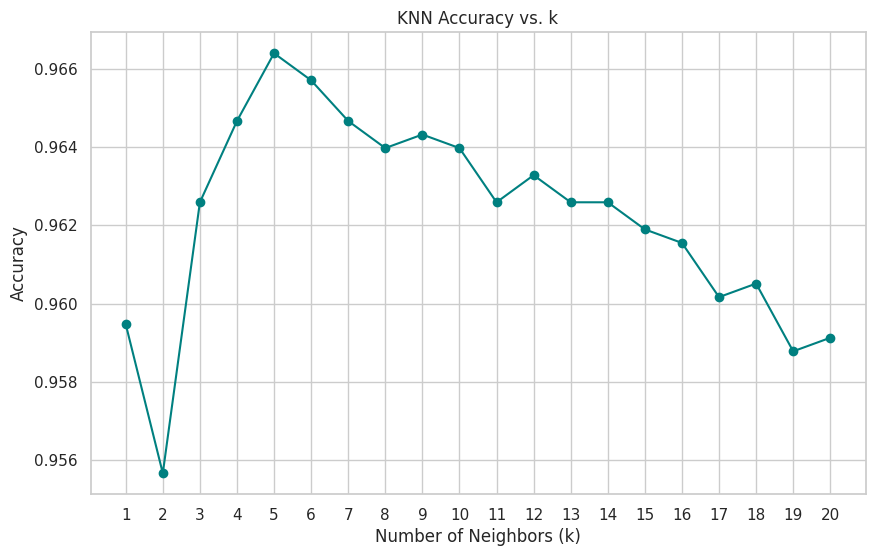

In [61]:
k_values = range(1, 21)
accuracies = []

# Train and evaluate model for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='teal')
plt.title("KNN Accuracy vs. k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

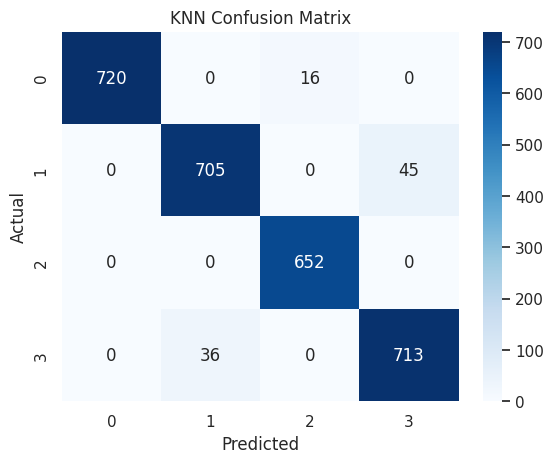

In [62]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()